# Data Preprocessing Template

## Importing the libraries

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [65]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 2].values

## Taking care of missing data

In [61]:
# Deprecated one
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer = imputer.fit(X[:, 1:3])
#X[:, 1:3] = imputer.transform(X[:, 1:3])

## Encoding categorical data

In [62]:
"""from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features=[0])
X = onehotencoder.fit_transform(X).toarray()
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)"""

'from sklearn.preprocessing import LabelEncoder, OneHotEncoder\nlabelencoder_X = LabelEncoder()\nX[:, 0] = labelencoder_X.fit_transform(X[:, 0])\nonehotencoder = OneHotEncoder(categorical_features=[0])\nX = onehotencoder.fit_transform(X).toarray()\nlabelencoder_y = LabelEncoder()\ny = labelencoder_y.fit_transform(y)'

## Splitting the dataset into the Training set and Test set

In [63]:
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

## Feature Scaling

In [74]:
# The use of scaling depends on the method used in machine learning
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(len(y), 1))
y = y.reshape(10)

/home/carlosnewmar/miniconda3/envs/newmar/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fitting SVR to the dataset

In [75]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([ 170370.0204065])

## Comparing models

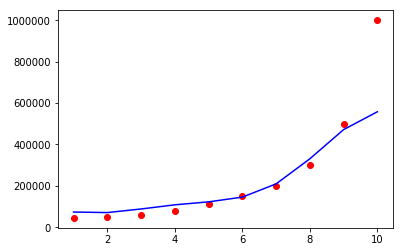

In [85]:
Xr = sc_X.inverse_transform(X)
yr = sc_y.inverse_transform(y.reshape(len(y), 1))
yr = yr.reshape(len(y))
plt.scatter(Xr, yr, color='red')

yp = regressor.predict(X)
yp = sc_y.inverse_transform(yp.reshape(len(y), 1))
yp = yp.reshape(len(y))
                                  
plt.plot(Xr, yp, color='blue')
plt.show()